# Data Visualization for Flights Data
## by Muddassar Sohail

## Investigation Overview

> I want to investigate which US airline is best and which one is worst performer based on different parameters like delays per flight and cacellations etc. I'm using dataset for the year 2008.


## Dataset Overview

> Data utilized for this project is about Flights and comes from "https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/HG7NV7/EIR0RA", provided by Udacity.
I divided data in two different categories; one for univariate analysis and the other for bivariate / multivariate analysis.
dataset used for multivariate and bivariate analysis contains more details about individual carrier like all delays, cancellations, total scheduled flights, delay per flight and total duration of delays in minutes.
Data has 29 features or we can say columns, and '2389217 number of rows, also contains delays and cancellations information for different carriers.

In [1]:
# initial libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# to ignore warnings
import warnings
warnings.simplefilter("ignore")

In [2]:
#df_uni = data frame for univariate analysis
df_uni = pd.read_csv('df_08_new.csv.bz2')
#df_mul = data frame for multivariate/bivariate analysis
df_mul = pd.read_csv('car_08_sort.csv')

## Flights distribution for the year 2008

> We can see from the distribution which was plotted for 20 different airlines for the year 2008 that only 0.1% is contribution of Aloha airline. The runners up is American Airline and then we have the highest contributer (17.1%) that is Southwest Airline.

In [3]:
#seaborn settings
sns.set_style('whitegrid')
sns.set_context("talk")

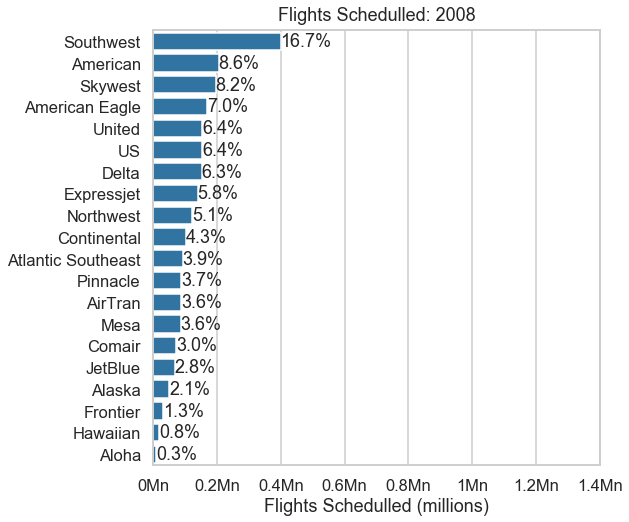

In [4]:
#sorting scheduled flights in descending pattern
df_fsort = df_uni.UniqueCarrier.value_counts().index

plt.figure(figsize = (8, 8))

# color-palette making
base_color = sns.color_palette()[0]

# plotting a count-plot for unique carrier column
sns.countplot(data = df_uni, y = 'UniqueCarrier', order = df_fsort,color = base_color);
plt.ylabel('Carrier Name')

plt.xlim(0, 1400000) # horizontal axis limit

# custom labels for horizontal axis
plt.xticks([0,200000,400000,600000,800000,1000000,1200000,1400000],['0Mn','0.2Mn','0.4Mn','0.6Mn','0.8Mn','1Mn','1.2Mn','1.4Mn'])

plt.ylabel('') # dropping y labels
plt.title('Flights Schedulled: 2008',pad = 10)
plt.xlabel('Flights Schedulled (millions)')

# getting flights scheduled percentage
df_fcnt = df_uni.UniqueCarrier.value_counts()
for counter in range(df_fcnt.shape[0]):
  cnt = df_fcnt[counter]
  pc_str = '{:0.1f}%'.format(100*cnt/df_uni.shape[0])
  plt.text(cnt+20, counter, pc_str, va = 'center');

## Total Flight Cancellations:

> We observed that more than 2 million flights were schedulled in the year 2008. Out of these 2 million, only 3% were cancelled while remaining were operated.

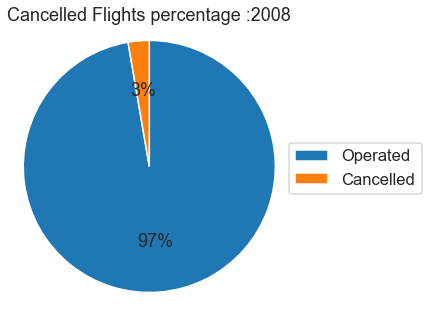

In [5]:
# data for cancelled flights
df_sort_cnt = df_uni['Cancelled'].value_counts()

plt.figure(figsize = (5, 5))
plt.title('Cancelled Flights percentage :2008',pad = 10);
labels = 'Operated', 'Cancelled'
plt.pie(df_sort_cnt, radius = 1, startangle = 90, autopct = '%1.f%%',counterclock = False);
plt.axis('equal')
plt.legend(labels = labels, loc = (1, 0.4))

## Cancellation Reasons:

> We saw earlier that out of 2.3 million, 3% flights are cancelled, which still is a huge number (71k) for cancellations. So, now we are trying to figure out reasons behind these cancellations.
We observed 4 different type of reasons for cancellations, plotted in graph distribution. Out of these reasons, weather and carrier cancellations were most prominent, which cover upto 80% of total cancellations.

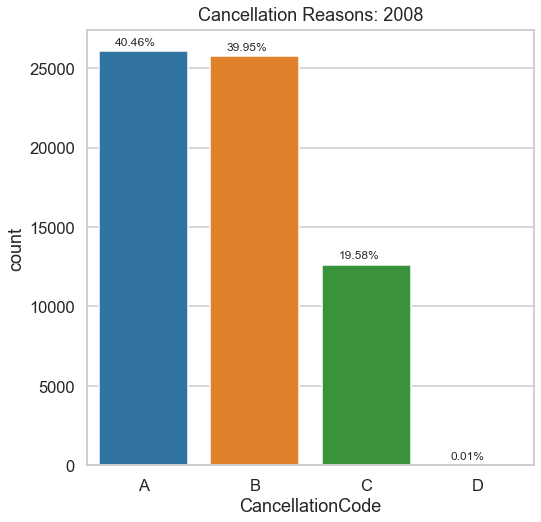

In [6]:
#data for cancellation codes in descending pattern
df_fc_sort = df_uni.CancellationCode.value_counts().index

plt.figure(figsize = (8, 8))
plt.xlabel('Cancellation Reasons')
plt.ylabel('Flights Cancelled')
plt.title('Cancellation Reasons: 2008', pad = 10)

# x axis labels
tic = np.arange(4)
plt.xticks(tic, ('Weather', 'Carrier', 'NAS', 'Security'))

# plotting a count-plot
sns.countplot(data = df_uni, x = 'CancellationCode', order = df_fc_sort);

# getting flights scheduled percentages
cancel_cods = df_uni.CancellationCode.value_counts()
for counter in range(cancel_cods.shape[0]):
  cnt = cancel_cods[counter]
  pc_str = '{:0.2f}%'.format(100*cnt/df_uni[df_uni.Cancelled == 1].shape[0])
  plt.text(counter-0.25, cnt+400, pc_str, fontsize = 12);

## Comparing Flight Cancellations:
> We can't compare total cancellations of carriers as some would have total flights more than others. So, we're compring cancellations per 100 flights. From the results we observe that MESA has 6% cancellations while Frontier Airline has the lowest percentage for cancellations.

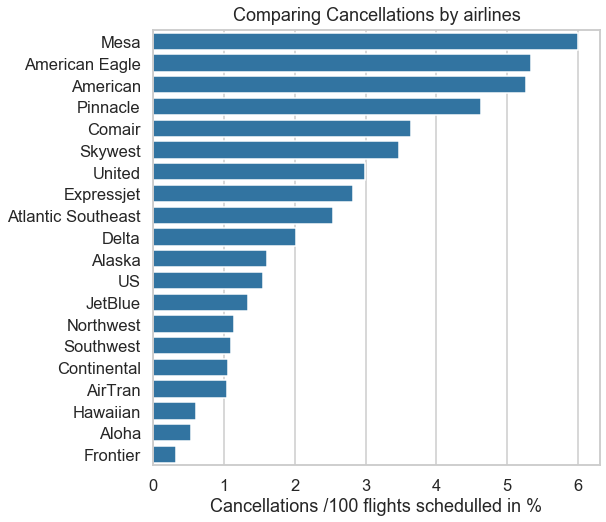

In [7]:
plt.figure(figsize = (8, 8))

# plotting bar chart for cancellations
base_color = sns.color_palette()[0]
pc_x = df_mul.sort_values('pct_cancelled', ascending = False)
sns.barplot(x = 'pct_cancelled', y = 'carrier_name', data = pc_x, color = base_color);

plt.xlabel('Cancellations /100 flights schedulled in %')
plt.ylabel('')
plt.title('Comparing Cancellations by airlines',
         pad = 10);

## Comparing Flight Delays:
> Similar to previous comparison, now we are comparing delays per 100 flights operated by airlines. From results we observed that Atlantic-Southeast airline has >16% delays per 100 flights operated while the lowest of only 3% appx. was observed for Aloha Airline.

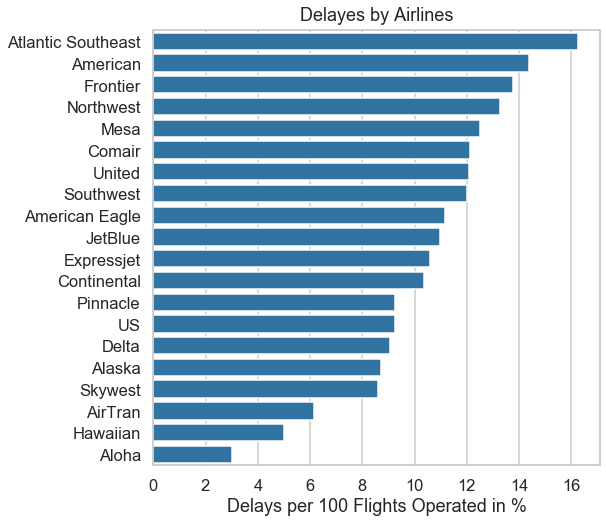

In [8]:

plt.figure(figsize = (8, 8))
base_color = sns.color_palette()[0]
pc_delay = df_mul.sort_values('pct_delayed', ascending = False)
sns.barplot(x = 'pct_delayed', y = 'carrier_name', data = pc_delay, color = base_color);
plt.xlabel('Delays per 100 Flights Operated in %')
plt.ylabel('')
plt.title('Delayes by Airlines',pad = 10);

## Comparing Delay Times:
> Delay time (minutes)/ flight operated is what we need to compare now. Aloha Airline was observed to have only 1 min of delay time per flight that was also the lowest of all. While Mesa Airlien got the maximum delay time that was 8 minutes.


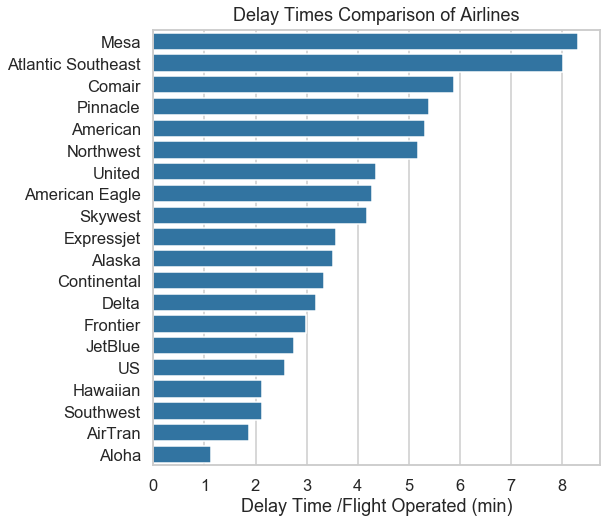

In [9]:
plt.figure(figsize = (8, 8))
base_color = sns.color_palette()[0]

del_tim = df_mul.sort_values('delay_per_flight', ascending = False)
sns.barplot(x = 'delay_per_flight', y = 'carrier_name', data = del_tim, color = base_color);

plt.xlabel('Delay Time /Flight Operated (min)')
plt.ylabel('')
plt.title('Delay Times Comparison of Airlines', pad = 10);

## Overall Performance of Airlines:

|       Parameters:               |                  Highest                 |                   Lowest              |  
|  :------------------------      |        :--------------------------:      |        ---------------------------:   |
|  cancellations percentage:      |         Mesa Airline (1st position)      |        Aloha Airline (2nd position)   |    
|  delays percentage:             |         Mesa Airline (5th position)      |        Aloha Airline (1st position)   | 
|  delay time per flight:         |         Mesa Airline (1st position)      |        Aloha Airline (1st position)   |

Airlines were compared based on the parameters enlisted above. We can see that Mesa Airline performed badly in all three criteri while Aloha Airline stands out well in all three parameters, So Aloha is surley the winner here.

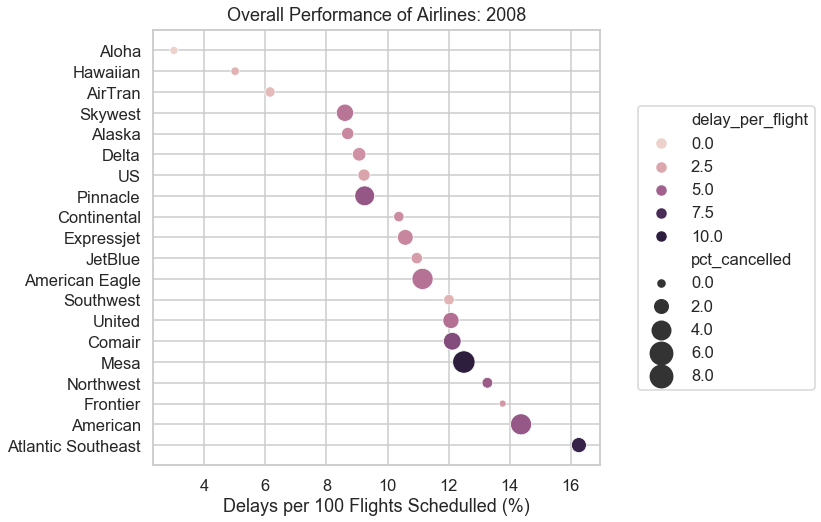

In [10]:
plt.figure(figsize = (8, 8))

c_pal = sns.cubehelix_palette(as_cmap=True)
pc_del = df_mul.sort_values('pct_delayed', ascending = False)

sns.scatterplot(data =pc_del, x = 'pct_delayed', y = 'carrier_name', hue = 'delay_per_flight', 
              size = 'pct_cancelled', palette = c_pal, sizes = (50, 500), hue_order = (5, 100));
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)
plt.xlabel('Delays per 100 Flights Schedulled (%)')
plt.ylabel('')
plt.title('Overall Performance of Airlines: 2008',pad = 10);